# import database :

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\MSI\gomycode\titanic-passengers-new.csv',sep=',')

df.head(7)

,Unnamed: 0,Title,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,period,FamilySize
0,0,Mr,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,0,0,0
1,1,Mr,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,0,0,0
2,2,Mr,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,0,0,0
3,3,Mrs,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,0,4,4
4,4,Mr,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,0,1,1
5,5,Mr,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,G6,0,2,2
6,6,Mr,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,G6,0,0,0


# logistic regression:

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


x = df[['Sex', 'Fare']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.82


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

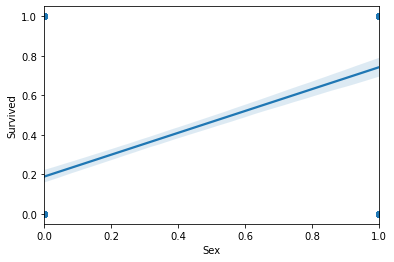

In [7]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=df)

# confusion matrix:

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

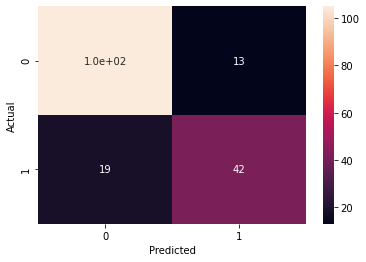

In [8]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       118
           1       0.76      0.69      0.72        61

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



# ROC-AUC CURVE :

the Receiver Operating Characteristic curve, or ROC curve is the probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [14]:
pred_prob1 = logreg.predict_proba(x_test)


In [15]:
from sklearn.metrics import roc_curve


fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [16]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.8184912475687691


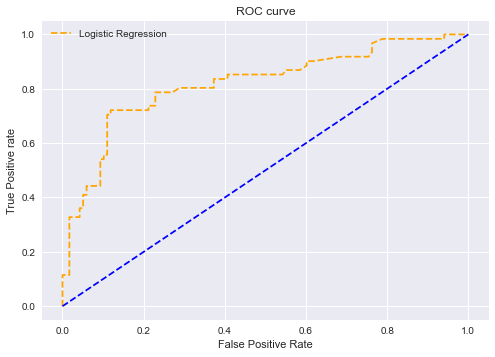

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show();